In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import deep_nn as nn

np.random.seed(999)

Let's start by loading the code and separating it into 3 different data sets: train, dev and test

In [44]:
data = pd.read_csv("train.csv").as_matrix().T

X = data[1:] / 255
Y = np.eye(10)[data[:1].reshape(-1)].T

X_train = X[:, :2000]
Y_train = Y[:, :2000]

X_dev = X[:, 2000:2300]
Y_dev = Y[:, 2000:2300]

X_test = X[:, 2300:2600]
Y_test = Y[:, 2300:2600]

print("X shapes", X.shape, X_train.shape, X_dev.shape, X_test.shape)
print("Y shapes", Y.shape, Y_train.shape, Y_dev.shape, Y_test.shape)


X shapes (784, 42000) (784, 2000) (784, 300) (784, 300)
Y shapes (10, 42000) (10, 2000) (10, 300) (10, 300)


Let's now initialize our DNN parameters

In [68]:
input_layer_dims = X.shape[0]
output_layer_dims = Y.shape[0]

parameters = nn.initialize_parameters([input_layer_dims, 400, 300, output_layer_dims])

Let's train the model. Probably 200 iterations of the code will be enough to see some noticeable info 

In [69]:
train_costs = []
train_accuracies = []

dev_costs = []
dev_accuracies = []

learning_rate = 0.03

In [70]:
for i in range(200):
    # Training
    AL, caches = nn.L_model_forward(X_train, parameters)
    train_cost = nn.compute_cost(AL, Y_train)
    train_costs.append(train_cost)
    grads = nn.L_model_backward(AL, Y_train, caches)
    parameters = nn.update_parameters(parameters, grads, learning_rate)

    prediction = np.argmax(AL, axis=0).reshape(1, AL.shape[1])
    expected = np.argmax(Y_train, axis=0).reshape(1, Y_train.shape[1])
    train_accuracy = np.sum(prediction == expected) / prediction.shape[1]
    train_accuracies.append(train_accuracy)

    # Dev computing
    dev_AL, dev_caches = nn.L_model_forward(X_dev, parameters)
    dev_cost = nn.compute_cost(dev_AL, Y_dev)
    dev_costs.append(dev_cost)

    prediction = np.argmax(dev_AL, axis=0).reshape(1, dev_AL.shape[1])
    expected = np.argmax(Y_dev, axis=0).reshape(1, Y_dev.shape[1])
    dev_accuracy = np.sum(prediction == expected) / prediction.shape[1]
    dev_accuracies.append(dev_accuracy)

    if i % 20 == 0:
        print("Costs after " + str(i) + " iterations:", train_cost, dev_cost)
        print("Accuracies after " + str(i) + " iterations:", train_accuracy, dev_accuracy)


Costs after 0 iterations: 0.697201157205 0.691750184692
Accuracies after 0 iterations: 0.083 0.08


Costs after 20 iterations: 0.58463628974 0.576471656607
Accuracies after 20 iterations: 0.133 0.116666666667


Costs after 40 iterations: 0.334704360278 0.335375726564
Accuracies after 40 iterations: 0.1185 0.0766666666667


Costs after 60 iterations: 0.332694953782 0.334333875495
Accuracies after 60 iterations: 0.1185 0.0766666666667


Costs after 80 iterations: 0.332061265003 0.333737545914
Accuracies after 80 iterations: 0.1185 0.0766666666667


Costs after 100 iterations: 0.331507929466 0.33314119938
Accuracies after 100 iterations: 0.1185 0.0766666666667


Costs after 120 iterations: 0.330999514404 0.332586974407
Accuracies after 120 iterations: 0.1185 0.0766666666667


Costs after 140 iterations: 0.330515135049 0.332063206664
Accuracies after 140 iterations: 0.1185 0.0766666666667


Costs after 160 iterations: 0.330037002003 0.331552957276
Accuracies after 160 iterations: 0.1185 0.0766666666667


Costs after 180 iterations: 0.329547575348 0.331037037314
Accuracies after 180 iterations: 0.1185 0.0766666666667


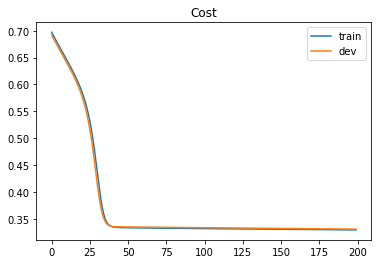

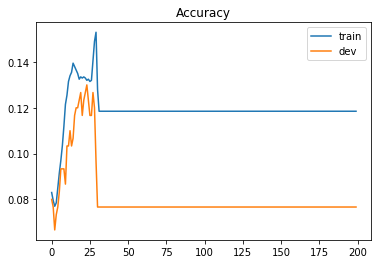

In [72]:
plt.figure()
plt.plot(train_costs)  # plott cost fn
plt.plot(dev_costs)
plt.title("Cost")
plt.legend(['train', 'dev'])

plt.figure()
plt.plot(train_accuracies)  # plott cost fn
plt.plot(dev_accuracies)
plt.title("Accuracy")
plt.legend(['train', 'dev'])

plt.show()